<a href="https://colab.research.google.com/github/chenjj2/colab_tests/blob/master/Basic_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install torch torchvision

    100% |████████████████████████████████| 2.0MB 8.1MB/s 
imgaug 0.2.8 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
fastai 1.0.46 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:
import torch
import torch.nn as nn

In [0]:
X = torch.tensor(([2,9],[1,5],[3,6]), dtype=torch.float)
y = torch.tensor(([92],[100],[89]), dtype=torch.float)
xPredicted = torch.tensor([4,8], dtype=torch.float)

In [0]:
print(X.size())

torch.Size([3, 2])


In [0]:
X_max, _ = torch.max(X,0)
print(X_max)

tensor([3., 9.])


In [0]:
X = torch.div(X, X_max)
print(X)

tensor([[0.6667, 1.0000],
        [0.3333, 0.5556],
        [1.0000, 0.6667]])


In [0]:
xPredicted_max, _ = torch.max(xPredicted, 0)
xPredicted = torch.div(xPredicted, xPredicted_max)
y = y/100

print(xPredicted)
print(y)

tensor([0.5000, 1.0000])
tensor([[0.9200],
        [1.0000],
        [0.8900]])


In [0]:
class Neural_Network(nn.Module):
  def __init__(self,):
    super(Neural_Network, self).__init__()
    self.inputSize = 2
    self.outputSize = 1
    self.hiddenSize = 3
    
    self.W1 = torch.randn(self.inputSize, self.hiddenSize)
    self.W2 = torch.randn(self.hiddenSize, self.outputSize)
    
  def forward(self, X):
    self.z = torch.matmul(X, self.W1)
    # self.sigmoid(defined below), not torch.sigmoid
    self.z2 = self.sigmoid(self.z) 
    self.z3 = torch.matmul(self.z2, self.W2)
    o = self.sigmoid(self.z3)
    return o
  
  def sigmoid(self, s):
    return 1 / (1 + torch.exp(-s))
  
  def sigmoidPrime(self, s):
    # derivative of sigmoid
    return s*(1-s)
  
  def backward(self, X, y, o):
    self.o_error = y-o
    self.o_delta = self.o_error * self.sigmoidPrime(o)
    self.z2_error = torch.matmul(self.o_delta, torch.t(self.W2))
    self.z2_delta = self.z2_error * self.sigmoidPrime(self.z2)
    self.W1 += torch.matmul(torch.t(X), self.z2_delta)
    self.W2 += torch.matmul(torch.t(self.z2), self.o_delta)
    # no return value, because W1/W2 are updated already
    
  def train(self, X, y):
    o = self.forward(X)
    self.backward(X, y, o)
    
  def saveWeights(self, model):
    torch.save(model, 'NN')
    # model can be reload with
    # torch.load('NN')
    
  def predict(self, xPredicted):
    # simply do forward again, based on tuned W1/W2
    print (self.forward(xPredicted))

In [0]:
NN = Neural_Network()
losses = []
for i in range(1000): # train 100 times
  loss = torch.mean((y-NN(X))**2).detach().item()
  losses.append(loss)
  #print (str(i)+' Loss: '+str(loss))
  NN.train(X,y)

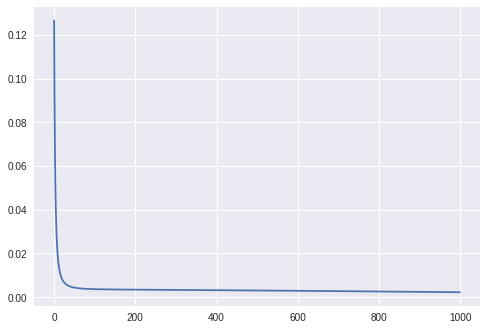

In [0]:
import matplotlib.pyplot as plt
plt.plot(losses)

In [0]:
print(X)
print(y)
NN.predict(X)

tensor([[0.6667, 1.0000],
        [0.3333, 0.5556],
        [1.0000, 0.6667]])
tensor([[0.9200],
        [1.0000],
        [0.8900]])
tensor([[0.9394],
        [0.9299],
        [0.9282]])


In [0]:
print(xPredicted)
NN.predict(xPredicted)

tensor([0.5000, 1.0000])
tensor([0.9407])
